<a href="https://colab.research.google.com/github/RayRay887/AI-Projects/blob/main/Logistic_Regression_Cancer_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression Notes

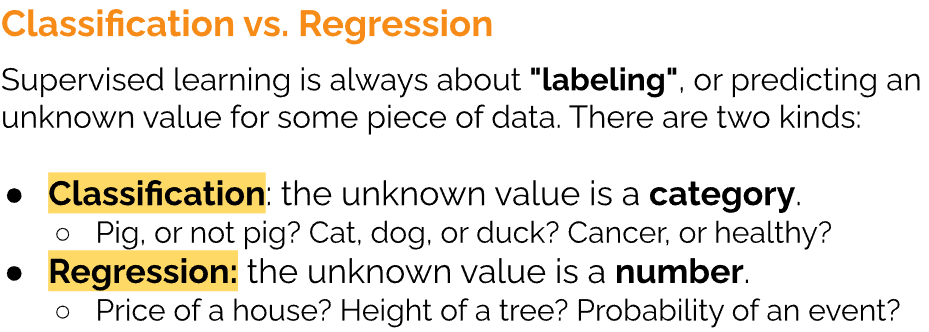

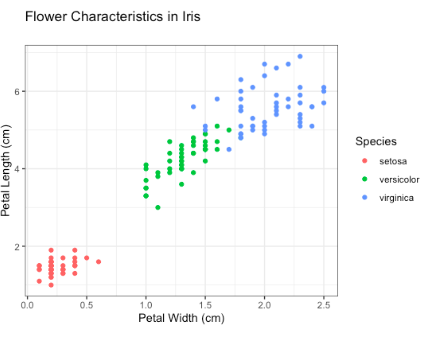

In the case above logistic regression makes more sense even though the trend is linear


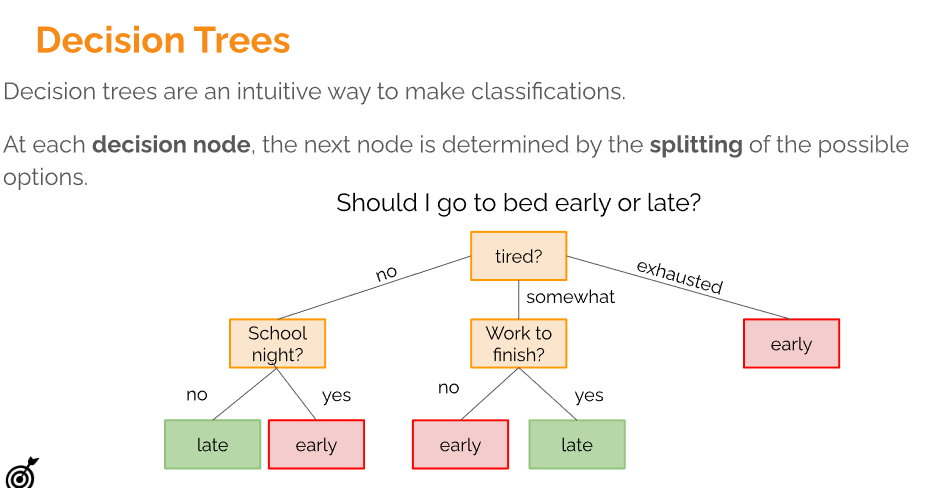

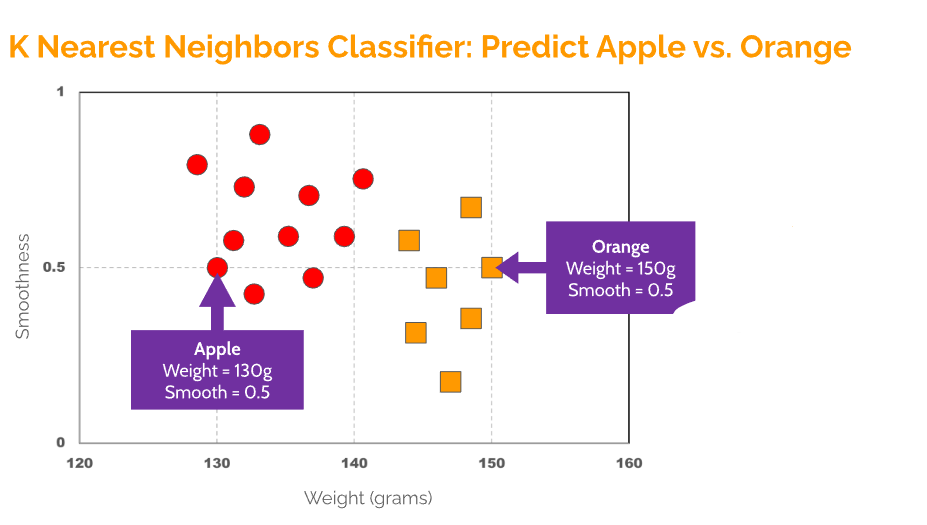

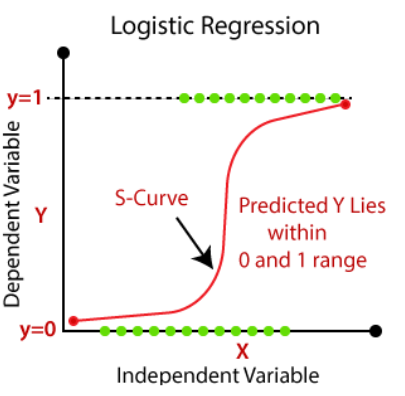

How to determine K-neighbors?

1. Weights 

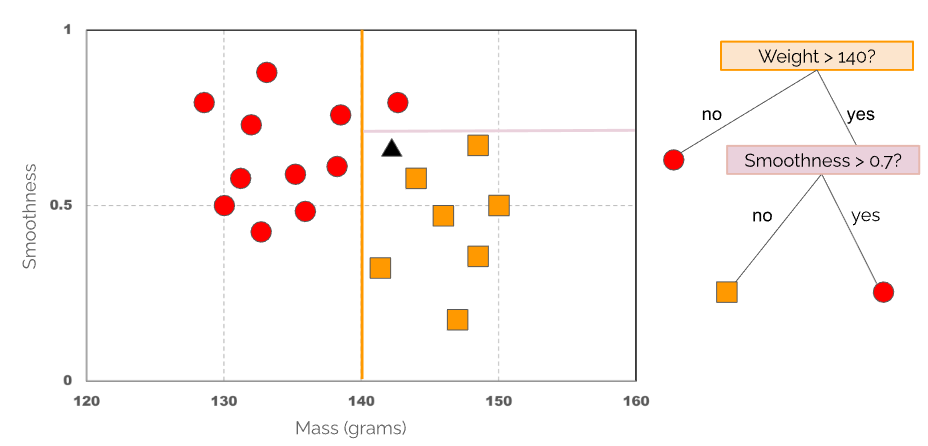

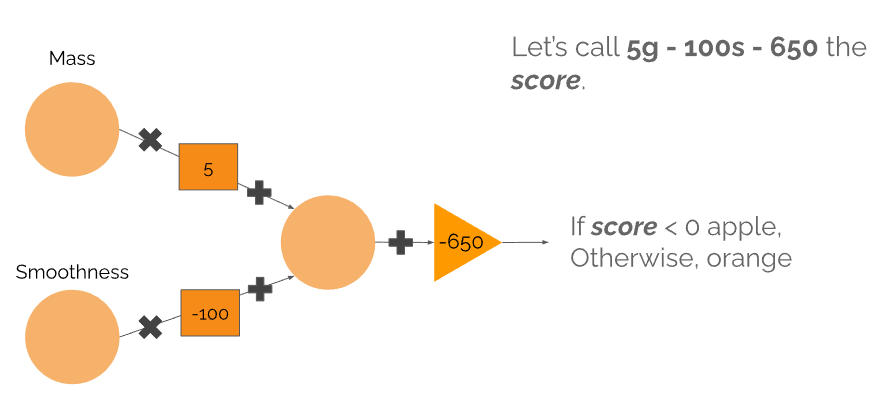

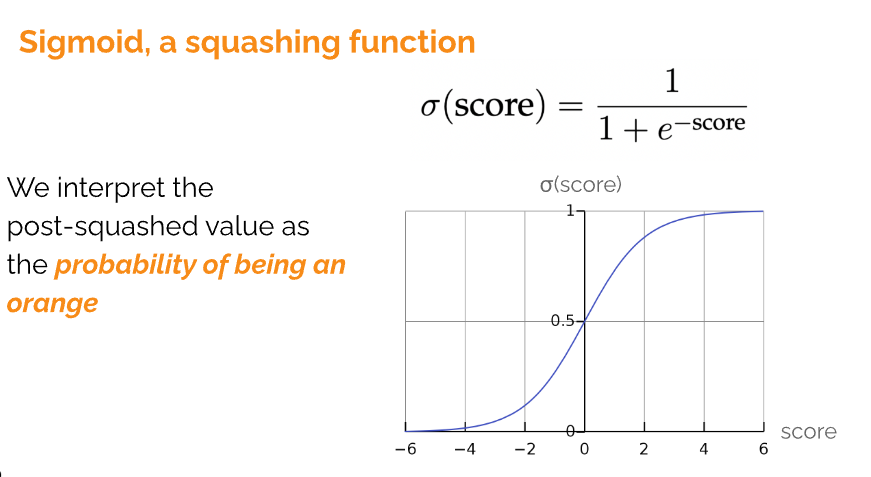


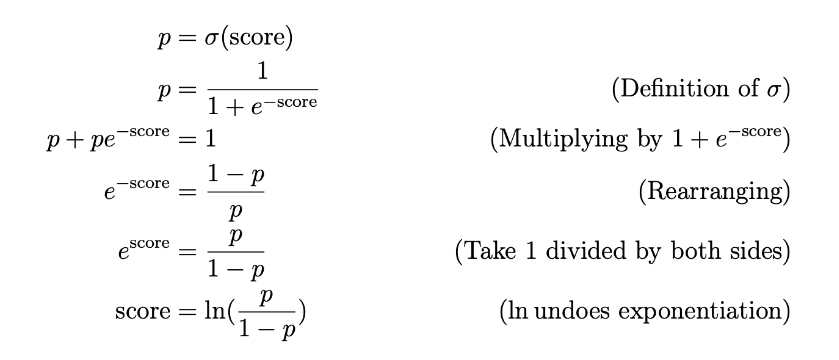

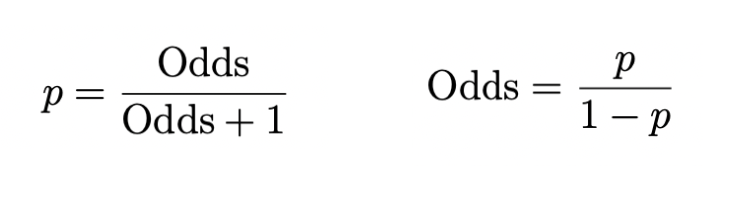

##Breast Cancer Biopsy Classification

Breast cancer tumors are very complicated at the cellular level, and this makes determining whether a patient's tumor is malignant (dangerous) or benign (not dangerous) a challenge. Every patient that arrives at the hospital undergoes a biopsy of their tumor. This means that a small sample of the tumor is taken from the patient and various metrics are recorded about it, including: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. 

# Background and data exploration

## Diagnosing cancer with biopsies


Developing Classifier

![alt text](https://www.rxdatascience.com/hubfs/Raj%20Files/es1.jpg)

The above image is an example of cancerous (malignant) breast cells next to benign cells. These cells are part of a tumor biopsy where the extracted tissue is sampled with a special needle. The cells are subsequently stained with different dyes to help visualize their shapes, quantity of DNA, etc. These properties provide clues and insight into the rate of cell division (Rapid cell division = Cancerous). 

The Dataset being used reports 10 different features of the biopsies. Some of them are: 

1. $Perimeter$: Total distance between points defining the cell's nuclear perimeter.
2. $Radius$: Average distance from the center of the cell's nucleus to its perimeter.
3. $Texture$: The texture of the cell nucleus is measured by finding the variance of the gray scale intensities in the component pixels.
4. $Area$: Nuclear area is measured by counting the number of pixels on the interior of the nucleus and adding one-half of the pixels in the perimeter.

5. $Smoothness$: Measures the smoothness of a nuclear contour by measuring the difference between the length of a radial line and the mean length of the lines surrounding it. The image below demonstrates this:

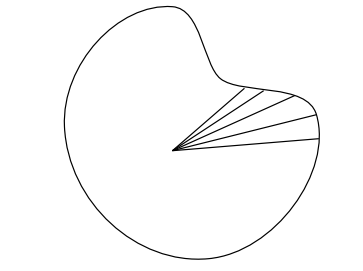

6. $Concavity$: Measures the severity of concavities or indentations in a cell nucleus. Chords are drawn between non-adjacent snake points and measure the extent to which the actual boundary lies inside each chord. The line in bold in the image below is an example of a chord.

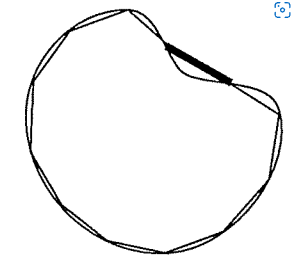

7. $Symmetry$: The major axis (longest chord) through the center is found. Then, the difference between the distance on both sides of the lines that are perpendicular to the major axis is calculated. The image below shows an example of this:

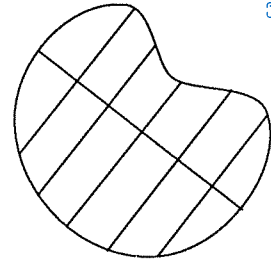!

The paper that detailed these measurements for this dataset: https://pdfs.semanticscholar.org/1c4a/4db612212a9d3806a848854d20da9ddd0504.pdf 


## Breast cancer diagnostic dataset

Using the Breast Cancer Wisconsin (Diagnostic) Data Set, consists of 569 biopsy samples, just like the ones described above, from breast cancer tumors. 

Each biopsy sample in the dataset is labeled with an ID number and whether or not the tumor it came from is malignant (1) or benign (0). Each sample also has 10 different features associated with it, some of which are described above. Remember that each feature value for a given biopsy sample is a real-valued number.


In [1]:
# Load the data!
import pandas as pd
from sklearn import metrics

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/cancer.csv"

data = pd.read_csv('cancer.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer.csv')
del data

cancer.csv          100%[===================>] 122.27K  --.-KB/s    in 0.001s  


## Loading annotated dataset to train model

In [2]:
import os             
import numpy as np    
import pandas as pd   
from sklearn.metrics import accuracy_score   


In [3]:
data_path  = 'cancer.csv'
dataframe = pd.read_csv(data_path)

dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

In [4]:
# glimpse of what data looks like
dataframe.head()

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)



* $diagnosis$: Whether the tumor was diagnosed as malignant (1) or benign (0).
* $perimeter$_$mean$: The average perimeter of cells in that particular biopsy
* $radius$_$mean$: The average radius of cells in that particular biopsy
* $texture$_$mean$: The average texture of cells in that particular biopsy
* $area$_$mean$: The average area of cells in that particular biopsy
* $smoothness$_$mean$: The average smoothness of cells in that particular biopsy
* $concavity$_$mean$: The average concavity of cells in that particular biopsy
* $symmetry$_$mean$: The average symmetry of cells in that particular biopsy

In [5]:
# data types of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   diagnosis        569 non-null    int64   
 1   perimeter_mean   569 non-null    float64 
 2   radius_mean      569 non-null    float64 
 3   texture_mean     569 non-null    float64 
 4   area_mean        569 non-null    float64 
 5   smoothness_mean  569 non-null    float64 
 6   concavity_mean   569 non-null    float64 
 7   symmetry_mean    569 non-null    float64 
 8   diagnosis_cat    569 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 36.4 KB


 ## Visualizing dataset


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


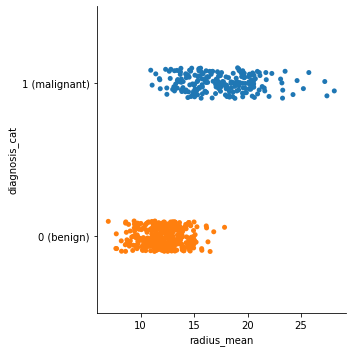

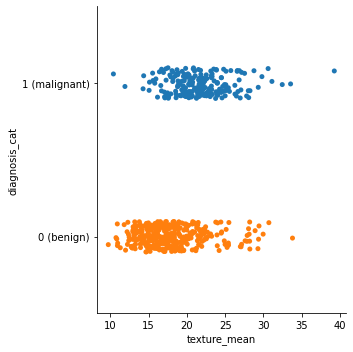

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
dataframe.head()

sns.catplot(x = 'texture_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])


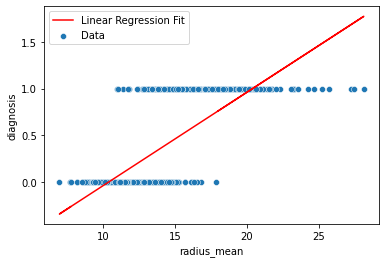

In [7]:
#trying linear regression first
from sklearn import linear_model

X,y = dataframe[['radius_mean']], dataframe[['diagnosis']]

model = linear_model.LinearRegression()
model.fit(X, y)
preds = model.predict(X)

sns.scatterplot(x='radius_mean', y='diagnosis', data=dataframe)
plt.plot(X, preds, color='r')
plt.legend(['Linear Regression Fit', 'Data'])

#model does poorly as expected

##Classification -  Simple Boundary Classifier

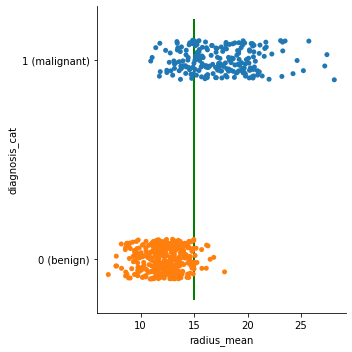

In [8]:
#  drawing a boundary
boundary = 15

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([boundary, boundary], [-.2, 1.2], 'g', linewidth = 2)

In [9]:
# takes best boundary
def boundary_classifier(target_boundary, radius_mean_series):
  result = []
  for i in radius_mean_series:
    if i > target_boundary:
      result.append(1)
    else:
      result.append(0)
  return result

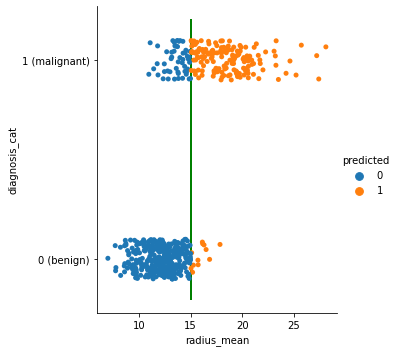

In [12]:
chosen_boundary = 15

y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred

y_true = dataframe['diagnosis']

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([chosen_boundary, chosen_boundary], [-.2, 1.2], 'g', linewidth = 2)

In [13]:
print (list(y_true))
print (y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

In [15]:
#accuracy of boundary
accuracy = accuracy_score(y_true,y_pred)
print(accuracy)

0.8892794376098418


## Logistic Regression - using ML


In [16]:
from sklearn.model_selection import train_test_split

# splitting train and test data
train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

In [17]:
print('Number of rows in training dataframe:', train_df.shape[0])
train_df.head()

Number of rows in training dataframe: 455


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
408,1,117.80,17.99,20.66,991.7,0.10360,0.120100,0.1992,1 (malignant),1
4,1,135.10,20.29,14.34,1297.0,0.10030,0.198000,0.1809,1 (malignant),1
307,0,56.36,9.00,14.40,246.3,0.07005,0.003681,0.1788,0 (benign),0
386,0,78.78,12.21,14.09,462.0,0.08108,0.068390,0.1646,0 (benign),0
404,0,78.29,12.34,14.95,469.1,0.08682,0.021090,0.1571,0 (benign),0


In [18]:
print('Number of rows in test dataframe:', test_df.shape[0])
test_df.head()

Number of rows in test dataframe: 114


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
421,0,98.22,14.69,13.98,656.1,0.10310,0.14500,0.2086,0 (benign),0
47,1,85.98,13.17,18.66,534.6,0.11580,0.12260,0.2128,1 (malignant),0
292,0,83.14,12.95,16.02,513.7,0.10050,0.06155,0.1730,0 (benign),0
186,1,118.60,18.31,18.58,1041.0,0.08588,0.08169,0.1621,1 (malignant),1
414,1,96.71,15.13,29.81,719.5,0.08320,0.04686,0.1852,1 (malignant),1


### Single Variable Logistic Regression


In [20]:
X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
print('X_train,  input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, output variable:')
print(y_train.head())

X_train,  input variables:
     radius_mean
408        17.99
4          20.29
307         9.00
386        12.21
404        12.34

y_train, output variable:
408    1
4      1
307    0
386    0
404    0
Name: diagnosis, dtype: int64


In [22]:
#model training
logreg_model = linear_model.LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# making model predict
X_test = test_df[X]
y_test = test_df[y]

y_pred = logreg_model.predict(X_test)

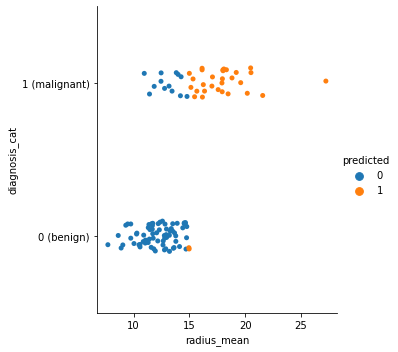

In [24]:
#graph
test_df['predicted'] = y_pred.squeeze()
sns.catplot(x = X[0], y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.868421052631579


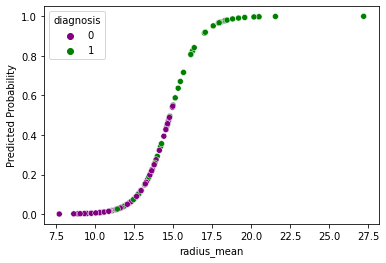

In [26]:
# soft predictions for x_test
y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['purple','green'])

# looks like a logistic regression curve based on probabilities

# Multiple Feature Logistic Regression 

Checking multiple/all features

In [27]:
dataframe.head(1)

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.8,17.99,10.38,1001.0,0.1184,0.3001,0.2419,1 (malignant),1


In [28]:
multi_X = ['perimeter_mean', 'radius_mean', 'texture_mean','area_mean']
y = 'diagnosis'

# Split data into train and test
multi_train_df, multi_test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

# Prepare your X_train, X_test, y_train, and y_test variables by extracting the appropriate columns:
multi_X_train, multi_X_test = multi_train_df[multi_X], multi_test_df[multi_X]
y_train, y_test = multi_train_df[y], multi_test_df[y]

# Initialize the model object
model = linear_model.LogisticRegression()

# Fit the model to the training data
model.fit(multi_X_train, y_train)

# Use this trained model to predict on the test data
multi_preds = model.predict(multi_X_test)

# Evaluate the accuracy by comparing to to the test labels and print out accuracy.
accuracy = accuracy_score(y_test, multi_preds)
print(multi_X)
print(accuracy)

# higher accuracy

['perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean']
0.8771929824561403


###Confusion Matrices

![Confusion Matrix](https://miro.medium.com/max/860/1*7EcPtd8DXu1ObPnZSukIdQ.png)

where the terms mean:

* **TP (True Positive)** = The model predicted positive (malignant in our case, since malignant has a label of 1) and it’s true.
* **TN (True Negative)** = The model predicted negative (benign in our case, since benign has a label of 0) and it’s true. 
* **FP (False Positive)** = The model predicted positive and it’s false.
* **FN (False Negative)** = The model predicted negative and it’s false.

Text(0.5, 257.44, 'Predicted diagnosis')

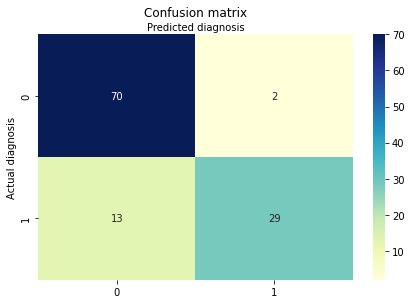

In [29]:
from sklearn import metrics

# Create the Confusion Matrix
# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

###Choosing a Metric

**Accuracy:** What portion of our predictions are right?

**Precision:** What portion of our positive predictions are actually positive?

**Recall:** What portion of the actual positives did we identify?

In [31]:
print (cnf_matrix)
(tn, fp), (fn, tp) = cnf_matrix
print ("TN, FP, FN, TP:", tn, fp, fn, tp)

[[70  2]
 [13 29]]
TN, FP, FN, TP: 70 2 13 29


In [32]:
# equation for A, P and R

accuracy = (tp + tn)/(tn + fp + fn + tp)
precision = (tp)/(tp + fp)
recall = tp/(tp + fn)

print ("accuracy, precision, recall", accuracy, precision, recall)

accuracy, precision, recall 0.868421052631579 0.9354838709677419 0.6904761904761905


#Decision Trees 



In [30]:
from sklearn import tree

class_dt = tree.DecisionTreeClassifier(max_depth=3)

# use previous `X_train` and `y_train` sets to build the model
class_dt.fit(multi_X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'X[0] <= 98.755\ngini = 0.468\nsamples = 455\nvalue = [285, 170]'),
 Text(0.25, 0.625, 'X[0] <= 89.995\ngini = 0.213\nsamples = 314\nvalue = [276, 38]'),
 Text(0.125, 0.375, 'X[0] <= 85.25\ngini = 0.108\nsamples = 263\nvalue = [248, 15]'),
 Text(0.0625, 0.125, 'gini = 0.046\nsamples = 214\nvalue = [209, 5]'),
 Text(0.1875, 0.125, 'gini = 0.325\nsamples = 49\nvalue = [39, 10]'),
 Text(0.375, 0.375, 'X[2] <= 19.75\ngini = 0.495\nsamples = 51\nvalue = [28, 23]'),
 Text(0.3125, 0.125, 'gini = 0.337\nsamples = 28\nvalue = [22, 6]'),
 Text(0.4375, 0.125, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(0.75, 0.625, 'X[2] <= 16.395\ngini = 0.12\nsamples = 141\nvalue = [9, 132]'),
 Text(0.625, 0.375, 'X[3] <= 999.05\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.5625, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.375, 'X[0] <= 108.85\ngini = 0.031\nsamples = 129\nvalue = [2, 12

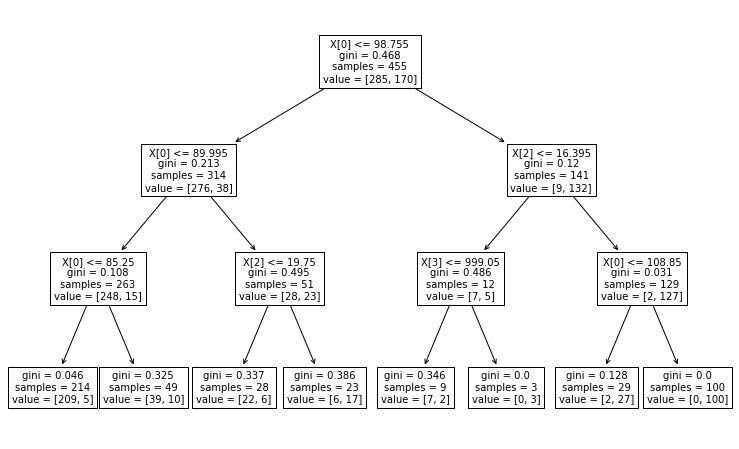

In [33]:
# Visualize and interpret the tree
plt.figure(figsize=(13,8))  # set plot size
tree.plot_tree(class_dt, fontsize=10) 

In [34]:
# Find the predictions based on the model
multi_y_pred = class_dt.predict(multi_X_test)

In [35]:
# Calculate model performance
print("Accuracy: ", metrics.accuracy_score(y_test, multi_y_pred))
print("Precision: ", metrics.precision_score(y_test, multi_y_pred))
print("Recall: ", metrics.recall_score(y_test, multi_y_pred))

Accuracy:  0.8596491228070176
Precision:  0.8611111111111112
Recall:  0.7380952380952381


# Choosing a different Classifier

(https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/).

Use a for loop to train and evaluate each classifer in the list on our dataset. Calculate the precision, recall, and accuracy on the test set for each classifier, and store the results in a data frame so it's easy to analyze. Create plots to show the relationships between precision, accuracy, and recall and help you choose the "best" classifier.

In [38]:
# import classifiers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [39]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()] 


for classifier in classifiers:
  print("---------------")
  print(str(classifier) + '\n')
  classifier.fit(multi_X_train, y_train)
  multi_y_pred = classifier.predict(multi_X_test)
  print("Accuracy: ", metrics.accuracy_score(y_test, multi_y_pred))
  print("Precision: ", metrics.precision_score(y_test, multi_y_pred))
  print("Recall: ", metrics.recall_score(y_test, multi_y_pred)) 

  print("---------------")

# recall is the most important for cancer GaussianProcessClassifier is probably best


---------------
KNeighborsClassifier(n_neighbors=3)

Accuracy:  0.8508771929824561
Precision:  0.8378378378378378
Recall:  0.7380952380952381
---------------
---------------
SVC(C=0.025, kernel='linear')

Accuracy:  0.8596491228070176
Precision:  0.8421052631578947
Recall:  0.7619047619047619
---------------
---------------
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))



/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


Accuracy:  0.868421052631579
Precision:  0.8461538461538461
Recall:  0.7857142857142857
---------------
---------------
DecisionTreeClassifier(max_depth=5)

Accuracy:  0.8596491228070176
Precision:  0.8823529411764706
Recall:  0.7142857142857143
---------------
---------------
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

Accuracy:  0.868421052631579
Precision:  0.9090909090909091
Recall:  0.7142857142857143
---------------
---------------
MLPClassifier(alpha=1, max_iter=1000)

Accuracy:  0.8508771929824561
Precision:  1.0
Recall:  0.5952380952380952
---------------
---------------
AdaBoostClassifier()

Accuracy:  0.8596491228070176
Precision:  0.8421052631578947
Recall:  0.7619047619047619
---------------
---------------
GaussianNB()

Accuracy:  0.8771929824561403
Precision:  0.9375
Recall:  0.7142857142857143
---------------
---------------
QuadraticDiscriminantAnalysis()

Accuracy:  0.9035087719298246
Precision:  0.9428571428571428
Recall:  0.7857142857142857